In [1]:
%load_ext autoreload
%autoreload 2
import pickle
import numpy as np
from collections import namedtuple, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

In [57]:
run_name = 'ROC'
NUM_GRAPHS = 10

In [58]:
all_results = []
data = []
for graph_num in range(NUM_GRAPHS):
    res = pickle.load(open('{}_{}_result.pkl'.format(run_name, graph_num), 'rb'))
    _, FPTP_dict, _, _, _ = res
    all_results.append(FPTP_dict)
    for algo_name in FPTP_dict.keys():
        for lamb, (FPR, TPR) in FPTP_dict[algo_name].items():
            if type(lamb) != tuple:
                lamb = tuple((lamb,))
            data.append((graph_num, algo_name, lamb, FPR, TPR))

In [59]:
df = pd.DataFrame(data, columns = ['RunID', 'AlgoName', 'lambda', 'FPR', 'TPR'])
agg_data = []
for key, item in df.groupby(['AlgoName', 'lambda']):
    FPR_rate = item.FPR.mean()
    TPR_rate = item.TPR.mean()
    algo_name = key[0]
    agg_data.append((algo_name, key[1], FPR_rate, TPR_rate))

In [60]:
agg_df = pd.DataFrame(agg_data, columns=['Algo Name', 'Lambda', 'mean_FPR', 'mean_TPR'])
agg_df.head()

,Algo Name,Lambda,mean_FPR,mean_TPR
0,SH,"(0.6,)",0.249872,0.471111
1,SH,"(0.7,)",0.300243,0.523889
2,SH,"(0.75,)",0.324488,0.523889
3,SH,"(0.8,)",0.355717,0.548889
4,SH,"(0.85,)",0.367974,0.565556


/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


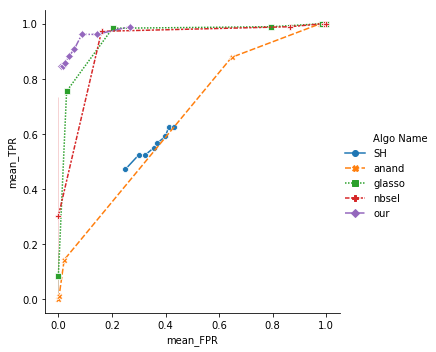

In [61]:
g = sns.relplot(x='mean_FPR', y='mean_TPR', data = agg_df, kind='line', 
            hue='Algo Name',
            style='Algo Name',
            markers = True)